In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar arquivo
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')
df_exames.head()

In [ ]:
df_exames.info()

In [ ]:
df_exames['genero'].unique()

In [ ]:
# Remover coluna id_paciente - Não é necessária para o modelo
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [ ]:
# Converter uma variável categórica (gênero) em numérica, usando One-Hot Encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [ ]:
df_exames.head()

In [ ]:
# Apresentar Mapa de calor com correlação
sns.heatmap(df_exames.corr(),vmin=-1, vmax=1, annot=True)

In [ ]:
# Mapa de correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado',ascending=False),vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
# Plot de Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

In [ ]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,4), figsize=(10,5))

In [ ]:
# Criau uma feature nova
# IMC = peso / altura ^2
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura'] / 100)** 2))

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [27]:
# Modelo 1 - Sem IMC
X = df_exames.drop(columns=['imc', 'resultado'])
y = df_exames['resultado']

In [28]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [31]:
# Treinar o algorítimo de Regressão Linear -Modelo 1
model_1 = LinearRegression().fit(X_train, y_train)

In [32]:
# Gerar Predições do conjunto de testes com base no modelo 1
y_pred = model_1.predict(X_test)

In [34]:
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [35]:
model_1.intercept_

np.float64(94.21133142019875)

In [36]:
# R2 Score quanto mais próximo de 1 melhor
model_1.score(X_train, y_train)

0.06218388634297267

In [37]:
# R2 Score - Conjunto de Testes
model_1.score(X_test, y_test)

-0.1364090447910642

In [38]:
# R2 Score - Testes
r2_score(y_test, y_pred)

-0.1364090447910642

In [39]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

np.float64(12.695569181179541)

In [40]:
# Segundo Modelo - Apenas IMC
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [41]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [42]:
# Treinar o algorítimo de regressão Linear - modelo 2
model_2 = LinearRegression().fit(X_train, y_train)

In [43]:
# Gerar Predição com base no modelo para o conjunto de testes
y_pred = model_2.predict(X_test)

In [44]:
model_2.coef_

array([-0.21677589])

In [45]:
model_2.intercept_

np.float64(112.15019229088836)

In [46]:
# R2 Score quanto mais próximo de 1 melhor
model_2.score(X_train, y_train)

0.015285962664806862

In [47]:
# R2 Score - Conjunto de Testes
model_2.score(X_test, y_test)

-0.0889832856240178

In [48]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

np.float64(12.505651407060103)

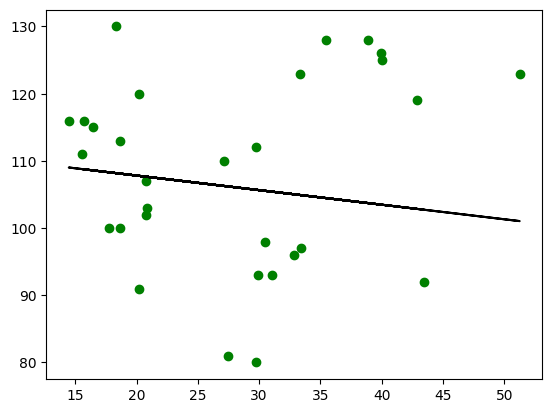

In [50]:
# Mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='k')